# Data Science summatieve opdracht
BD04 - Data Science | Blok 2 2022-2023

Deze opdracht is gemaakt door Finn Alberts en Laurent Dassen. Er is gebruik gemaakt van een dataset met informatie over de verschillende Pokémons. Deze is opgehaald van: https://www.kaggle.com/datasets/rounakbanik/pokemon.

## Beschrijving van de dataset
De dataset bestaat uit 801 Pokémons. De dataset bevat de volgende kolommen:
- `name`: De Engelse naam van de Pokémon.
- `japanese_name`: De originele Japanse naam van de Pokémon.
- `pokedex_number`: Het nummer van de Pokémon in de Pokédex.
- `percentage_male`: Het percentage mannelijke Pokémon. Als Pokémon geen geslacht hebben, is dit veld leeg.
- `type1`: Het primaire type van de Pokémon.
- `type2`: Het secundaire type van de Pokémon. Als Pokémon maar één type hebben, is dit veld leeg.
- `classification`: De classificatie van de Pokémon volgens de Pokédex van Pokémon Sun en Moon.
- `height_m`: De hoogte van de Pokémon in meters.
- `weight_kg`: Het gewicht van de Pokémon in kilogram.
- `capture_rate`: De kans dat een Pokémon wordt gevangen.
- `baseeggsteps`: Het aantal stappen dat nodig is om een ei van deze Pokémon te laten uitkomen.
- `abilities`: De vaardigheden van de Pokémon.
- `experience_growth`: De experience growth van de Pokémon.
- `base_happiness`: De base happiness van de Pokémon. Dit geeft aan hoe goed te band tussen de trainer en de Pokémon is.
- `against_?`: De effectiviteit van de Pokémon tegen de verschillende types. De vraagtekens worden vervangen door de type namen.
- `hp`: Het aantal health points (HP) van de Pokémon.
- `attack`: De attack van de Pokémon.
- `defense`: De defense van de Pokémon.
- `sp_attack`: De special attack van de Pokémon.
- `sp_defense`: De special defense van de Pokémon.
- `speed`: De speed van de Pokémon.
- `generation`: De generatie waarin de Pokémon is verschenen.
- `base_total`: De som van `attack`, `hp`, `defense`, `sp_attack`, `sp_defense` en `speed`.
- `is_legendary`: Of de Pokémon legendarisch is of niet. 0 betekent dat de Pokémon niet legendarisch is, 1 betekent dat de Pokémon wel legendarisch is.

In [86]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.svm import SVC

# Hide warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Data preparatie
Data preparatie is een belangrijk onderdeel van data science omdat het zorgt voor een grondige voorbereiding van de gegevens voor analyse. Dit omvat het opschonen en transformeren van de gegevens om ervoor te zorgen dat ze bruikbaar zijn voor het gewenste doel. Bijvoorbeeld, als de gegevens onvolledig of onjuist zijn, kan dit leiden tot onnauwkeurige of onbetrouwbare resultaten. Door de gegevens te prepareren, kan ervoor worden gezorgd dat de gegevens klaar zijn voor analyse en dat ze betrouwbare en nauwkeurige resultaten kunnen produceren. Data preparatie is dus essentieel om ervoor te zorgen dat data science-projecten succesvol zijn en dat ze waardevolle inzichten en voorspellingen kunnen produceren.

De Pokémon dataset is een relatief goede dataset, waarvoor slechts weinig preparatie nodig is. De volgende stappen zijn uitgevoerd:
1) Een aantal Pokémon hebben geen geslacht. De kolom `percentage_male` is dan leeg. De waardes in deze kolom zijn vervangen door een waarde `None`.
2) Voor een twintigtal Pokémon is er geen gewicht en lengte bekend. Deze waardes zijn gevuld met de gemiddelde lengte en gewicht van Pokémon.
3) Sommige Pokémon hebben slechts één type. De waardes in de kolom `type_2` zijn dan leeg. Deze waardes zijn vervangen door een waarde `None`.
4) Er is één enkele Pokémon die twee verschillende capture rates heeft. De waardes in de kolom `capture_rate` zijn vervangen door de gemiddelde capture rate van Pokémon.

In [87]:
# Read pokemon.csv using pandas
pokemon = pd.read_csv('pokemon.csv')

# Fill percentage male values with None where percentage is null
pokemon['percentage_male'] = pokemon['percentage_male'].fillna('None')

# Fill height_m en weight_kg with mean values where height_m or weight_kg is null
pokemon['height_m'] = pokemon['height_m'].fillna(pokemon['height_m'].mean())
pokemon['weight_kg'] = pokemon['weight_kg'].fillna(pokemon['weight_kg'].mean())

# Fill type2 with None where type2 is null
pokemon['type2'] = pokemon['type2'].fillna('None')

# Replace non-numeric values in capture_rate with the mean of the column
pokemon['capture_rate'] = pd.to_numeric(pokemon['capture_rate'], errors='coerce')
pokemon['capture_rate'] = pokemon['capture_rate'].fillna(pokemon['capture_rate'].mean())

## Multiple Linear Regression
Multiple linear regression is een statistische techniek die wordt gebruikt om het verband tussen één of meer onafhankelijke variabelen en één afhankelijke variabele te onderzoeken. In tegenstelling tot simpele lineaire regressie, waarbij er slechts één onafhankelijke variabele is, maakt multiple linear regression gebruik van meerdere onafhankelijke variabelen om de afhankelijke variabele te voorspellen. De techniek maakt gebruik van een lineaire vergelijking om de relatie tussen de variabelen te modelleren en kan worden gebruikt om een breed scala aan problemen op te lossen, waaronder voorspellingen van verkopen, niveaus van inkomen en andere zakelijke toepassingen. 

De formule voor multiple linear regression is als volgt: $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n $$

Voor de Pokémon-dataset worden `hp` (health points) en `height_m` (de hoogte in meters) als onafhankelijke variabelen gebruikt en `weight_kg` (het gewicht in kilogram) als afhankelijke variabele. Dat wil zeggen: het gewicht van de Pokémon proberen te voorspellen aan de hand van de hoogte en het aantal health points. 

In [101]:
# Create a LinearRegression model
model = LinearRegression()

# Create X and y
X = pokemon[['hp', 'height_m']]
y = pokemon['weight_kg']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Create a KFold object with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Use cross_val_score to perform cross validation for R^2 and train the model
scores = cross_val_score(model, X, y, scoring='r2', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean R^2 using cross validation:", np.mean(scores))
print("Standard deviation for R^2 using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for RMSE and train the model
scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean RMSE using cross validation:", np.mean(scores))
print("Standard deviation for RMSE using cross validation:", np.std(scores))

# Predict on the test data: y_pred
y_pred = model.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Draw a line to show the best fit
plt.plot([0, 400], [0, 400], 'r')

# Show the plot
plt.show()

Mean R^2 using cross validation: 0.3671296149700315
Standard deviation for R^2 using cross validation: 0.18675196824344403


ValueError: 'root_mean_squared_error' is not a valid scoring value. Use sklearn.metrics.get_scorer_names() to get valid options.

Zoals hierboven te zien is, is de root mean squared error (RMSE) gemiddeld -80. Dit betekent dat de voorspellingen gemiddeld 80 kilogram van het werkelijke gewicht afzitten. Dit is een relatief groot foutmarge. Als we kijken naar de r^2-score, zien we dat deze 0,37 is. Dit betekent dat de voorspellingen slechts 37% van de variatie in het gewicht van de Pokémon kunnen verklaren. Over het algemeen wordt gezegd dat waardes boven de 0,75 zeer goed zijn, waardes tussen de 0,50 en 0,75 redelijk goed, waardes tussen 0,25 en 0,50 matig en waardes onder de 0,25 slecht (Allwright, 2022).

Daarnaast is hierboven een grafiek te zien, die de voorspelde waardes uitzet tegen de werkelijke waardes. Iedere punt in deze grafiek geeft een voorspelling weer. Bij een perfecte voorspelling zouden de punten op de rode lijn liggen.

Het is mogelijk het model te verbeteren, door meer parameters te gebruiken. Hieronder is een voorbeeld te zien van multiple linear regression, waarbij meer features worden gebruikt. De extra features die worden toegevoegd zijn `speed`, `attack`, `defense`, `sp_attack` en `sp_defense`. Er is te zien dat de score voor de RMSE en de R^2-score een klein beetje beter is dan bij de eerste multiple linear regression. 

Mean R^2 using cross validation: 0.37752095519837675
Standard deviation for R^2 using cross validation: 0.18506708328705854
Mean RMSE using cross validation: -78.99196086880741
Standard deviation for RMSE using cross validation: 24.963982309937485


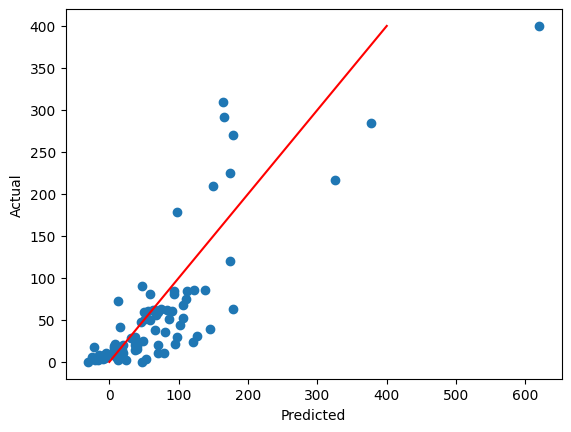

In [89]:
# Create a LinearRegression model
model = LinearRegression()

# Create X and y
X = pokemon[['hp', 'height_m', 'speed', 'attack', 'defense', 'sp_attack', 'sp_defense']]
y = pokemon['weight_kg']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Create a KFold object with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Use cross_val_score to perform cross validation for R^2 and train the model
scores = cross_val_score(model, X, y, scoring='r2', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean R^2 using cross validation:", np.mean(scores))
print("Standard deviation for R^2 using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for RMSE and train the model
scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean RMSE using cross validation:", np.mean(scores))
print("Standard deviation for RMSE using cross validation:", np.std(scores))

# Predict on the test data: y_pred
y_pred = model.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Draw a line to show the best fit
plt.plot([0, 400], [0, 400], 'r')

# Show the plot
plt.show()

Zoals eerder genoemd, zijn bovenstaande waardes dus iets beter als de waardes, waarbij minder features zijn gebruikt.

## Logistic Regression
Logistic regression is een statistische techniek die wordt gebruikt om de relatie tussen één of meer onafhankelijke variabelen en een afhankelijke variabele te onderzoeken. In tegenstelling tot lineaire regressie, waarbij de afhankelijke variabele een continue waarde kan hebben, heeft de afhankelijke variabele in logistische regressie altijd twee mogelijke waarden (bijvoorbeeld "ja" of "nee", "man" of "vrouw", enz.). De techniek maakt gebruik van een logistische functie om de relatie tussen de variabelen te modelleren en kan worden gebruikt om problemen op te lossen waarbij de afhankelijke variabele een binair karakter heeft. 

Voor Pokémon wordt logistic regression gebruikt om te voorspellen of een Pokémon legendary is of niet. Hiervoor worden de features `hp`, `attack`, `defense`, `sp_attack`, `sp_defense` en `speed` gebruikt.

In [90]:
# Create a LogisticRegression model
model = LogisticRegression(random_state=1)

# Create X and y
X = pokemon[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]
y = pokemon['is_legendary']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix with labels for prediction and actual values
print("Confusion matrix for a single model")
print(pd.DataFrame(cm, index=['Actual Not Legendary', 'Actual Legendary'], columns=['Predicted Not Legendary', 'Predicted Legendary']))

# Calculate the precision, recall and accuracy of the model

# Print a header
print('\nMetrics for Logistic Regression Model using cross validation')

# Create a KFold object with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Use cross_val_score to perform cross validation for precision and train the model
scores = cross_val_score(model, X, y, scoring='precision', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean precision using cross validation:", np.mean(scores))
print("Standard deviation for precision using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for recall and train the model
scores = cross_val_score(model, X, y, scoring='recall', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean recall using cross validation:", np.mean(scores))
print("Standard deviation for recall using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for accuracy and train the model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean accuracy using cross validation:", np.mean(scores))
print("Standard deviation for accuracy using cross validation:", np.std(scores))

Confusion matrix for a single model
                      Predicted Not Legendary  Predicted Legendary
Actual Not Legendary                       67                    2
Actual Legendary                            6                    6

Metrics for Logistic Regression Model using cross validation
Mean precision using cross validation: 0.6488095238095238
Standard deviation for precision using cross validation: 0.17449717200731005
Mean recall using cross validation: 0.41920634920634914
Standard deviation for recall using cross validation: 0.1310772853095145
Mean accuracy using cross validation: 0.9288734567901233
Standard deviation for accuracy using cross validation: 0.02425594584383691


Zoals hierboven te zien is, is dit een relatief goede voorspelling. De accuracy is 0,93. Dit betekent dat de voorspellingen 93% van de tijd correct zijn. De precision is 0,65. Dit betekent dat van alle voorspellingen, waarbij de Pokémon legendary zou zijn volgens het model, dit 65% van de tijd correct werd voorspeld. De recall is 0,42. Dit betekent dat van alle legendary Pokémon die in de dataset zitten, 42% correct zijn voorspeld.

Deze voorspellingswaardes lijken op het eerste gezicht best goed. Echter is de recall relatief laaag. Dit is te verklaren, doordat er slechts een klein aantal legendary Pokémon is. Doordat het model vaak een Pokémon als niet legendary voorspelt, is de recall laag. Maar omdat er relatief weinig legendary Pokémon zijn, voorspelt het model het vaak goed.

Hieronder is een voorbeeld te zien van logistic regression, waarbij minder features worden gebruikt. Er wordt nu enkel nog gebruikt gemaakt van `hp`, `sp_attack` en `sp_defense`. 

In [91]:
# Create a LogisticRegression model
model = LogisticRegression(random_state=1)

# Create X and y
X = pokemon[['hp', 'sp_attack', 'sp_defense']]
y = pokemon['is_legendary']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix with labels for prediction and actual values
print("Confusion matrix for a single model")
print(pd.DataFrame(cm, index=['Actual Not Legendary', 'Actual Legendary'], columns=['Predicted Not Legendary', 'Predicted Legendary']))

# Calculate the precision, recall and accuracy of the model

# Print a header
print('\nMetrics for Logistic Regression Model using cross validation')

# Create a KFold object with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Use cross_val_score to perform cross validation for precision and train the model
scores = cross_val_score(model, X, y, scoring='precision', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean precision using cross validation:", np.mean(scores))
print("Standard deviation for precision using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for recall and train the model
scores = cross_val_score(model, X, y, scoring='recall', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean recall using cross validation:", np.mean(scores))
print("Standard deviation for recall using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for accuracy and train the model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean accuracy using cross validation:", np.mean(scores))
print("Standard deviation for accuracy using cross validation:", np.std(scores))

Confusion matrix for a single model
                      Predicted Not Legendary  Predicted Legendary
Actual Not Legendary                       69                    0
Actual Legendary                            9                    3

Metrics for Logistic Regression Model using cross validation
Mean precision using cross validation: 0.7166666666666667
Standard deviation for precision using cross validation: 0.3077697552103231
Mean recall using cross validation: 0.31202380952380954
Standard deviation for recall using cross validation: 0.16720020892315168
Mean accuracy using cross validation: 0.9276697530864197
Standard deviation for accuracy using cross validation: 0.025679591970250874


Zoals hierboven te zien is, zorgen meer features hier voor een hogere precision en accuracy, maar voor een lagere recall. Wanneer `attack` en `defense` niet mee worden genomen, voorspelt het model veel minder vaak een Pokémon als legendary. Daardoor is de recall lager, maar de precision en accuracy hoger.

Er kan ook met de hyperparameters worden gespeeld. Hieronder is een voorbeeld te zien van logistic regression, waarbij de hyperparameters zijn aangepast. De hyperparameter die is aangepast is de `class_weight`. Door deze op `'balanced'` te zetten, wordt de recall hoger. Dit komt doordat het model nu meer rekening houdt met het feit dat er relatief weinig legendary Pokémon zijn.

In [92]:
# Create a LogisticRegression model
model = LogisticRegression(class_weight='balanced', random_state=1)

# Create X and y
X = pokemon[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]
y = pokemon['is_legendary']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix with labels for prediction and actual values
print("Confusion matrix for a single model")
print(pd.DataFrame(cm, index=['Actual Not Legendary', 'Actual Legendary'], columns=['Predicted Not Legendary', 'Predicted Legendary']))

# Calculate the precision, recall and accuracy of the model

# Print a header
print('\nMetrics for Logistic Regression Model using cross validation')

# Create a KFold object with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Use cross_val_score to perform cross validation for precision and train the model
scores = cross_val_score(model, X, y, scoring='precision', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean precision using cross validation:", np.mean(scores))
print("Standard deviation for precision using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for recall and train the model
scores = cross_val_score(model, X, y, scoring='recall', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean recall using cross validation:", np.mean(scores))
print("Standard deviation for recall using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for accuracy and train the model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean accuracy using cross validation:", np.mean(scores))
print("Standard deviation for accuracy using cross validation:", np.std(scores))

Confusion matrix for a single model
                      Predicted Not Legendary  Predicted Legendary
Actual Not Legendary                       64                    5
Actual Legendary                            1                   11

Metrics for Logistic Regression Model using cross validation
Mean precision using cross validation: 0.4708025389643037
Standard deviation for precision using cross validation: 0.07438603239493807
Mean recall using cross validation: 0.9478174603174603
Standard deviation for recall using cross validation: 0.06446458800439173
Mean accuracy using cross validation: 0.9014197530864199
Standard deviation for accuracy using cross validation: 0.029067438497322226


Zoals verwacht, is de recall nu vele malen hoger en de precision gezakt. Dit komt doordat het model nu vaker een Pokémon als legendary voorspelt en daarin dus ook vaker fout zit. Hij kan echter wel beter de legendary Pokémon voorspellen, omdat hij nu meer rekening houdt met het feit dat er relatief weinig legendary Pokémon zijn.

# Decision Trees en Random Forests
Decision trees zijn een veelgebruikte data science techniek. Het is een methode voor het maken van voorspellingen door het splitsen van de dataset in verschillende groepen. De splitsingen worden gemaakt op basis van de waardes van de features, waarbij wordt geprobeerd om de groepen zo accuraat mogelijk te splitsen. Voor het bepalen van de splitsingen wordt gebruik gemaakt van een algoritme, dat de splitsingen bepaalt op basis van de gini-index. De gini-index is een maat voor de mate van ongelijkheid in een groep. Hoe lager de gini-index, hoe meer gelijkheid er is in de groep. De formule voor de gini-index is als volgt: $$ Gini = 1 - \sum_{i=1}^n p_i^2 $$

Random Forests zijn een verbeterde versie van decision trees. Bij random forests worden meerdere decision trees gemaakt, waarbij bij het maken van de trees steeds een willekeurige subset van de features wordt gebruikt. Daarnaast wordt voor het maken van deze decision trees steeds een bootstrapped dataset gebruikt. Dit is een dataset, waarbij random samples uit de originele dataset worden gepakt. De bootstrapped dataset is even groot als de originele dataset, maar kan samples dubbel bevatten. Gemiddeld gezien bevat een bootstrapped dataset 2/3 van de originele samples van de dataset. Hierdoor wordt voorkomen dat de trees te veel op elkaar lijken. De voorspellingen van de trees worden vervolgens gemiddeld, waardoor de voorspellingen van de random forest beter zijn dan die van de decision trees.

Voor Pokémon wordt gebruik gemaakt van random forests om te voorspellen of een Pokémon legendary is of niet. Hiervoor worden `hp`, `attack`, `defense`, `sp_attack`, `sp_defense`, `speed` gebruikt.

In [93]:
# Create a RandomForestClassifier model
model = RandomForestClassifier(random_state=1)

# Create X and y
X = pokemon[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]
y = pokemon['is_legendary']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix with labels for prediction and actual values
print("Confusion matrix for a single model")
print(pd.DataFrame(cm, index=['Actual Not Legendary', 'Actual Legendary'], columns=['Predicted Not Legendary', 'Predicted Legendary']))

# Print a header
print('\nMetrics for Random Forest Model using cross validation')

# Create a KFold object with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Use cross_val_score to perform cross validation for precision and train the model
scores = cross_val_score(model, X, y, scoring='precision', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean precision using cross validation:", np.mean(scores))
print("Standard deviation for precision using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for recall and train the model
scores = cross_val_score(model, X, y, scoring='recall', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean recall using cross validation:", np.mean(scores))
print("Standard deviation for recall using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for accuracy and train the model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean accuracy using cross validation:", np.mean(scores))
print("Standard deviation for accuracy using cross validation:", np.std(scores))

Confusion matrix for a single model
                      Predicted Not Legendary  Predicted Legendary
Actual Not Legendary                       68                    1
Actual Legendary                            8                    4

Metrics for Random Forest Model using cross validation
Mean precision using cross validation: 0.725
Standard deviation for precision using cross validation: 0.18442854683830506
Mean recall using cross validation: 0.43460317460317455
Standard deviation for recall using cross validation: 0.17346824507204456
Mean accuracy using cross validation: 0.9351234567901235
Standard deviation for accuracy using cross validation: 0.02768564969262246


Zoals aan bovenstaande metrieken te zien is, is het lastig om een Pokémon als legendary te voorspellen. Ondanks dat de precision en accuracy relatief hoog zijn, is de recall slechts 43%. Dat wil zeggen dat het model niet vaak een Pokémon als legendary voorspelt, terwijl deze wel legendary is.

Hieronder is een voorbeeld te zien van random forests, waarbij minder features worden gebruikt. Er wordt nu alleen gebruik gemaakt van `hp`, `sp_attack` en `sp_defense`.

In [94]:
# Create a RandomForestClassifier model
model = RandomForestClassifier(random_state=1)

# Create X and y
X = pokemon[['hp', 'sp_attack', 'sp_defense']]
y = pokemon['is_legendary']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix with labels for prediction and actual values
print("Confusion matrix for a single model")
print(pd.DataFrame(cm, index=['Actual Not Legendary', 'Actual Legendary'], columns=['Predicted Not Legendary', 'Predicted Legendary']))

# Print a header
print('\nMetrics for Random Forest Model using cross validation')

# Create a KFold object with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Use cross_val_score to perform cross validation for precision and train the model
scores = cross_val_score(model, X, y, scoring='precision', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean precision using cross validation:", np.mean(scores))
print("Standard deviation for precision using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for recall and train the model
scores = cross_val_score(model, X, y, scoring='recall', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean recall using cross validation:", np.mean(scores))
print("Standard deviation for recall using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for accuracy and train the model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean accuracy using cross validation:", np.mean(scores))
print("Standard deviation for accuracy using cross validation:", np.std(scores))

Confusion matrix for a single model
                      Predicted Not Legendary  Predicted Legendary
Actual Not Legendary                       66                    3
Actual Legendary                            9                    3

Metrics for Random Forest Model using cross validation
Mean precision using cross validation: 0.6783333333333333
Standard deviation for precision using cross validation: 0.21344398172198092
Mean recall using cross validation: 0.38519841269841265
Standard deviation for recall using cross validation: 0.12779281805400064
Mean accuracy using cross validation: 0.9289043209876542
Standard deviation for accuracy using cross validation: 0.025326613048969562


Zoals hierboven te zien is, is het model minder goed in het voorspellen van legendary Pokémon. Dat betekent dat minder features in dit geval niet beter werkt. 

Net als voor logistic regression kan hier de `class_weight` worden aangepast. Hieronder is een voorbeeld te zien van random forests, waarbij de `class_weight` is aangepast naar `'balanced'`. Deze heeft echter weinig impact en de resultaten zijn vergelijkbaar met die van de random forests zonder `'class_weight'`.

In [95]:
# Create a RandomForestClassifier model
model = RandomForestClassifier(class_weight='balanced', random_state=1)

# Create X and y
X = pokemon[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]
y = pokemon['is_legendary']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix with labels for prediction and actual values
print("Confusion matrix for a single model")
print(pd.DataFrame(cm, index=['Actual Not Legendary', 'Actual Legendary'], columns=['Predicted Not Legendary', 'Predicted Legendary']))

# Print a header
print('\nMetrics for Random Forest Model using cross validation')

# Create a KFold object with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Use cross_val_score to perform cross validation for precision and train the model
scores = cross_val_score(model, X, y, scoring='precision', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean precision using cross validation:", np.mean(scores))
print("Standard deviation for precision using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for recall and train the model
scores = cross_val_score(model, X, y, scoring='recall', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean recall using cross validation:", np.mean(scores))
print("Standard deviation for recall using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for accuracy and train the model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean accuracy using cross validation:", np.mean(scores))
print("Standard deviation for accuracy using cross validation:", np.std(scores))

Confusion matrix for a single model
                      Predicted Not Legendary  Predicted Legendary
Actual Not Legendary                       68                    1
Actual Legendary                            9                    3

Metrics for Random Forest Model using cross validation
Mean precision using cross validation: 0.7416666666666667
Standard deviation for precision using cross validation: 0.23702437755546485
Mean recall using cross validation: 0.4314285714285714
Standard deviation for recall using cross validation: 0.1922825066361385
Mean accuracy using cross validation: 0.9363888888888889
Standard deviation for accuracy using cross validation: 0.030115518332654433


# Neural Networks
Neural networks zijn een vorm van machine learning, waarbij een netwerk van neuronen wordt gebruikt om voorspellingen te maken. De neuronen in het netwerk worden verbonden met elkaar, waardoor het netwerk een bepaalde structuur krijgt. Deze structuur bestaat uit een aantal lagen. Iedere laag bestaat op zijn beurt weer uit een aantal neuronen. Een netwerk bestaat altijd uit een input layer en een output layer. De input layer bestaat uit de features van de dataset. De output layer bestaat uit de waardes die voorspeld moeten worden. Daartussen staan de zogenoemde hidden layers. Het aantal hidden layers en het aantal neuronen per laag kan variëren.

Voor Pokémon wordt gebruik gemaakt van neural networks om te voorspellen of een Pokémon legendary is of niet. Hiervoor worden `hp`, `attack`, `defense`, `sp_attack`, `sp_defense`, `speed`, `weight_kg` en `height_m` gebruikt.

In [96]:
# Create a MLPClassifier model
model = MLPClassifier(random_state=1)

# Create X and y
X = pokemon[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'height_m']]
y = pokemon['is_legendary']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix with labels for prediction and actual values
print("Confusion matrix for a single model")
print(pd.DataFrame(cm, index=['Actual Not Legendary', 'Actual Legendary'], columns=['Predicted Not Legendary', 'Predicted Legendary']))

# Print a header
print('\nMetrics for Neural Network Model using cross validation')

# Create a KFold object with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Use cross_val_score to perform cross validation for precision and train the model
scores = cross_val_score(model, X, y, scoring='precision', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean precision using cross validation:", np.mean(scores))
print("Standard deviation for precision using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for recall and train the model
scores = cross_val_score(model, X, y, scoring='recall', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean recall using cross validation:", np.mean(scores))
print("Standard deviation for recall using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for accuracy and train the model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean accuracy using cross validation:", np.mean(scores))
print("Standard deviation for accuracy using cross validation:", np.std(scores))


Confusion matrix for a single model
                      Predicted Not Legendary  Predicted Legendary
Actual Not Legendary                       68                    1
Actual Legendary                           11                    1

Metrics for Neural Network Model using cross validation
Mean precision using cross validation: 0.6464285714285715
Standard deviation for precision using cross validation: 0.2547758118144544
Mean recall using cross validation: 0.30246031746031743
Standard deviation for recall using cross validation: 0.12009405170417108
Mean accuracy using cross validation: 0.9163580246913579
Standard deviation for accuracy using cross validation: 0.023735149858812796


Zoals te zien is, is het model niet goed in staat om een Pokémon als legendary te voorspellen. De recall is laag, waardoor het model vaak een Pokémon als niet legendary voorspelt, terwijl deze wel legendary is. De precision is slechts 64%, waardoor het model vaak een Pokémon als legendary voorspelt, terwijl deze niet legendary is. De accuracy is relatief hoog, maar dat komt doordat het model vaak een Pokémon als niet legendary voorspelt. Daardoor is het model vaak juist, maar is het model niet goed in het voorspellen van legendary Pokémon.

Hieronder is een voorbeeld te zien van neural networks, waarbij minder features worden gebruikt. Er wordt nu enkel nog gebruikt gemaakt van `hp`, `sp_attack` en `sp_defense`.

In [97]:
# Create a MLPClassifier model
model = MLPClassifier(random_state=1)

# Create X and y
X = pokemon[['hp', 'sp_attack', 'sp_defense']]
y = pokemon['is_legendary']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix with labels for prediction and actual values
print("Confusion matrix for a single model")
print(pd.DataFrame(cm, index=['Actual Not Legendary', 'Actual Legendary'], columns=['Predicted Not Legendary', 'Predicted Legendary']))

# Print a header
print('\nMetrics for Neural Network Model using cross validation')

# Create a KFold object with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Use cross_val_score to perform cross validation for precision and train the model
scores = cross_val_score(model, X, y, scoring='precision', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean precision using cross validation:", np.mean(scores))
print("Standard deviation for precision using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for recall and train the model
scores = cross_val_score(model, X, y, scoring='recall', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean recall using cross validation:", np.mean(scores))
print("Standard deviation for recall using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for accuracy and train the model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean accuracy using cross validation:", np.mean(scores))
print("Standard deviation for accuracy using cross validation:", np.std(scores))


Confusion matrix for a single model
                      Predicted Not Legendary  Predicted Legendary
Actual Not Legendary                       69                    0
Actual Legendary                           12                    0

Metrics for Neural Network Model using cross validation
Mean precision using cross validation: 0.15
Standard deviation for precision using cross validation: 0.32015621187164245
Mean recall using cross validation: 0.03428571428571429
Standard deviation for recall using cross validation: 0.06975174637562116
Mean accuracy using cross validation: 0.9076388888888888
Standard deviation for accuracy using cross validation: 0.026236769152385268


Zoals te zien is het neural network nog minder goed in staat om te voorspellen of een Pokémon legendary is of niet. De precision en recall zijn beide slechts rond de 10%. De accuracy is dan wel 91%, maar dit komt omdat het model een groot deel van de Pokémon als niet legendary voorspelt en 91% van de Pokémon in de testset niet legendary is.

# Support Vector Machines
Support Vector Machines (SVMs) zijn een soort van lineaire classificatiemodellen. Het doel van een SVM is om een lijn of hyperplane te vinden die de verschillende klassen zo goed mogelijk scheidt. De lijn of hyperplane wordt gekozen op basis van de datapunten die het dichtst bij de lijn liggen, deze worden de "support vectors" genoemd. Deze punten bepalen hoe de lijn of hyperplane precies is gepositioneerd. SVMs zijn zeer effectief in het oplossen van problemen met veel dimensies en kunnen ook worden gebruikt voor niet-lineaire problemen door middel van kernel-tricks.

Voor Pokémon wordt gebruik gemaakt van SVMs om te voorspellen of een Pokémon legendary is of niet. Hiervoor worden `hp`, `attack`, `defense`, `sp_attack`, `sp_defense`, `speed` gebruikt.

In [98]:
# Create a SVC model
model = SVC(random_state=1)

# Create X and y
X = pokemon[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'height_m']]
y = pokemon['is_legendary']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix with labels for prediction and actual values
print("Confusion matrix for a single model")
print(pd.DataFrame(cm, index=['Actual Not Legendary', 'Actual Legendary'], columns=['Predicted Not Legendary', 'Predicted Legendary']))

# Print a header
print('\nMetrics for SVM Model using cross validation')

# Create a KFold object with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Use cross_val_score to perform cross validation for precision and train the model
scores = cross_val_score(model, X, y, scoring='precision', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean precision using cross validation:", np.mean(scores))
print("Standard deviation for precision using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for recall and train the model
scores = cross_val_score(model, X, y, scoring='recall', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean recall using cross validation:", np.mean(scores))
print("Standard deviation for recall using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for accuracy and train the model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean accuracy using cross validation:", np.mean(scores))
print("Standard deviation for accuracy using cross validation:", np.std(scores))

Confusion matrix for a single model
                      Predicted Not Legendary  Predicted Legendary
Actual Not Legendary                       69                    0
Actual Legendary                           10                    2

Metrics for SVM Model using cross validation
Mean precision using cross validation: 0.7833333333333333
Standard deviation for precision using cross validation: 0.31666666666666665
Mean recall using cross validation: 0.3261904761904762
Standard deviation for recall using cross validation: 0.16233835497687735
Mean accuracy using cross validation: 0.9363888888888889
Standard deviation for accuracy using cross validation: 0.023731718109830238


Zoals hierboven te zien is het model, vergelijkbaar met de resultaten van logistic regression en random forests, niet goed in staat om een Pokémon als legendary te voorspellen. De recall is laag, waardoor het model vaak een Pokémon als niet legendary voorspelt, terwijl deze wel legendary is. De precision is dan wel 78% en de accuracy is 94%, maar dat komt doordat het model vaak een Pokémon als niet legendary voorspelt. Daardoor is het model vaak juist, maar is het model niet goed in het voorspellen van legendary Pokémon.

Het gebruiken van minder features is hieronder te zien. Er wordt nu enkel nog gebruikt gemaakt van `hp`, `sp_attack` en `sp_defense`.

In [99]:
# Create a SVC model
model = SVC(random_state=1)

# Create X and y
X = pokemon[['hp', 'sp_attack', 'sp_defense']]
y = pokemon['is_legendary']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix with labels for prediction and actual values
print("Confusion matrix for a single model")
print(pd.DataFrame(cm, index=['Actual Not Legendary', 'Actual Legendary'], columns=['Predicted Not Legendary', 'Predicted Legendary']))

# Print a header
print('\nMetrics for SVM Model using cross validation')

# Create a KFold object with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Use cross_val_score to perform cross validation for precision and train the model
scores = cross_val_score(model, X, y, scoring='precision', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean precision using cross validation:", np.mean(scores))
print("Standard deviation for precision using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for recall and train the model
scores = cross_val_score(model, X, y, scoring='recall', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean recall using cross validation:", np.mean(scores))
print("Standard deviation for recall using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for accuracy and train the model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean accuracy using cross validation:", np.mean(scores))
print("Standard deviation for accuracy using cross validation:", np.std(scores))

Confusion matrix for a single model
                      Predicted Not Legendary  Predicted Legendary
Actual Not Legendary                       69                    0
Actual Legendary                           11                    1

Metrics for SVM Model using cross validation
Mean precision using cross validation: 0.7766666666666666
Standard deviation for precision using cross validation: 0.319739477283199
Mean recall using cross validation: 0.23916666666666667
Standard deviation for recall using cross validation: 0.11144593118742062
Mean accuracy using cross validation: 0.9263888888888889
Standard deviation for accuracy using cross validation: 0.021730674684008834


De resultaten zijn vergelijkbaar met die van de SVMs met alle features. Dat betekent dat minder features in dit geval niet beter werkt. Hieronder wordt een model getraind met de `class_weight` aangepast naar `'balanced'`. Hierdoor houdt het model meer rekening met de onbalans in de dataset. 

In [100]:
# Create a SVC model
model = SVC(class_weight='balanced', random_state=1)

# Create X and y
X = pokemon[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'height_m']]
y = pokemon['is_legendary']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix with labels for prediction and actual values
print("Confusion matrix for a single model")
print(pd.DataFrame(cm, index=['Actual Not Legendary', 'Actual Legendary'], columns=['Predicted Not Legendary', 'Predicted Legendary']))

# Print a header
print('\nMetrics for SVM Model using cross validation')

# Create a KFold object with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Use cross_val_score to perform cross validation for precision and train the model
scores = cross_val_score(model, X, y, scoring='precision', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean precision using cross validation:", np.mean(scores))
print("Standard deviation for precision using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for recall and train the model
scores = cross_val_score(model, X, y, scoring='recall', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean recall using cross validation:", np.mean(scores))
print("Standard deviation for recall using cross validation:", np.std(scores))

# Use cross_val_score to perform cross validation for accuracy and train the model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

# Calculate the mean and standard deviation of the scores
print("Mean accuracy using cross validation:", np.mean(scores))
print("Standard deviation for accuracy using cross validation:", np.std(scores))

Confusion matrix for a single model
                      Predicted Not Legendary  Predicted Legendary
Actual Not Legendary                       60                    9
Actual Legendary                            1                   11

Metrics for SVM Model using cross validation
Mean precision using cross validation: 0.5092106586224234
Standard deviation for precision using cross validation: 0.09961869074894832
Mean recall using cross validation: 0.9547619047619047
Standard deviation for recall using cross validation: 0.09431096343018265
Mean accuracy using cross validation: 0.9151234567901234
Standard deviation for accuracy using cross validation: 0.02603235430205161


De impact van de `class_weight` op `'balanced'` zetten is vergelijkbaar met wat te zien was bij logistic regression en random forests. De recall is hoger, maar de precision is lager. Dit is op dezelfde manier te verklaren. Doordat het model meer rekening houdt met de onbalans in de dataset, worden er meer Pokémon als legendary voorspeld. Hierin maakt het model dan ook meer fouten.

# Conclusie
Op basis van de R^2 score en de RMSE kan worden gesteld dat er geen sterk verband ligt tussen de eigenschappen van een Pokémon en zijn/haar gewicht. Dit betekent dat het niet goed mogelijk is om het gewicht van een Pokémon te voorspellen. Wel is te zien dat het gebruiken van meerdere features een iets beter resultaat geeft. Dit is echter slechts een kleine verbetering (R^2 36.7% wordt 37.7% en RMSE -80.18 kg wordt -78.99 kg).

Bij de classificatiemodellen welke voorspellen of een Pokémon legendary is of niet kan worden gesteld dat dit erg lastig is, mede doordat de verhouding tussen legendary en niet legendary Pokémon erg ongelijk is. Vaak is de recall laag, maar de precision hoog. Door bij de modellen de hyperparameter `class_weight` aan te passen naar `'balanced'`, wordt rekening gehouden met deze ongelijkheid. Dit heeft tot gevolg dat de precision significant lager wordt, maar de recall significant hoger.

Voor het classificeren kunnen daarom twee modellen worden gekozen als meest geschikt, afhankelijk van het doel. Wanneer het doel is om met een grote zekerheid een Pokémon correct te kunnen classificeren als niet-legendary, dan blijkt een SVM met veel features en geen `class_weight` het beste te werken (precision 78%). Wanneer het doel is om met een grote zekerheid een Pokémon correct te kunnen classificeren als legendary, dan blijkt een SVM met veel features en een `class_weight` van `'balanced'` het beste te werken (recall 95%).

# Referenties
Allwright, S. (2022, 6 december). What is a good R-Squared value? (simply explained). Stephen Allwright. https://stephenallwright.com/good-r-squared-value/